In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings


In [2]:
df = pd.read_csv('Covid Data.csv')
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


### Overview of the dataset.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

In [4]:
df.isnull().sum()

USMER                   0
MEDICAL_UNIT            0
SEX                     0
PATIENT_TYPE            0
DATE_DIED               0
INTUBED                 0
PNEUMONIA               0
AGE                     0
PREGNANT                0
DIABETES                0
COPD                    0
ASTHMA                  0
INMSUPR                 0
HIPERTENSION            0
OTHER_DISEASE           0
CARDIOVASCULAR          0
OBESITY                 0
RENAL_CHRONIC           0
TOBACCO                 0
CLASIFFICATION_FINAL    0
ICU                     0
dtype: int64

In [5]:
df.describe()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,1.632194e+00,8.980565e+00,1.499259e+00,1.190765e+00,7.952288e+01,3.346831e+00,4.179410e+01,4.976558e+01,2.186404e+00,2.260569e+00,2.242626e+00,2.298132e+00,2.128989e+00,2.435143e+00,2.261810e+00,2.125176e+00,2.257180e+00,2.214333e+00,5.305653e+00,7.955397e+01
std,4.822084e-01,3.723278e+00,4.999997e-01,3.929041e-01,3.686889e+01,1.191288e+01,1.690739e+01,4.751073e+01,5.424242e+00,5.132258e+00,5.114089e+00,5.462843e+00,5.236397e+00,6.646676e+00,5.194850e+00,5.175445e+00,5.135354e+00,5.323097e+00,1.881165e+00,3.682307e+01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.000000e+00,4.000000e+00,1.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,3.000000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,9.700000e+01
50%,2.000000e+00,1.200000e+01,1.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,4.000000e+01,9.700000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,6.000000e+00,9.700000e+01
75%,2.000000e+00,1.200000e+01,2.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,5.300000e+01,9.700000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,7.000000e+00,9.700000e+01
max,2.000000e+00,1.300000e+01,2.000000e+00,2.000000e+00,9.900000e+01,9.900000e+01,1.210000e+02,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,7.000000e+00,9.900000e+01


## Data preprocessing

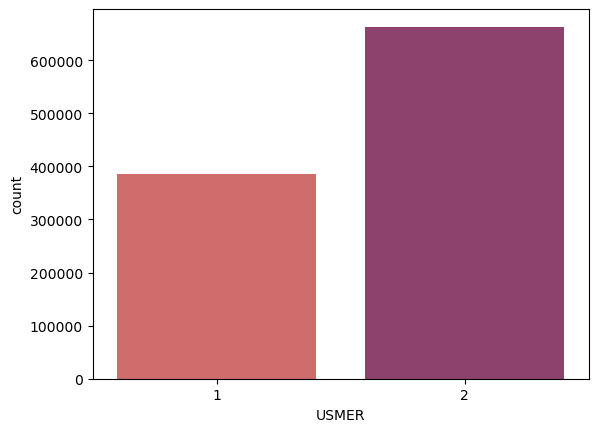

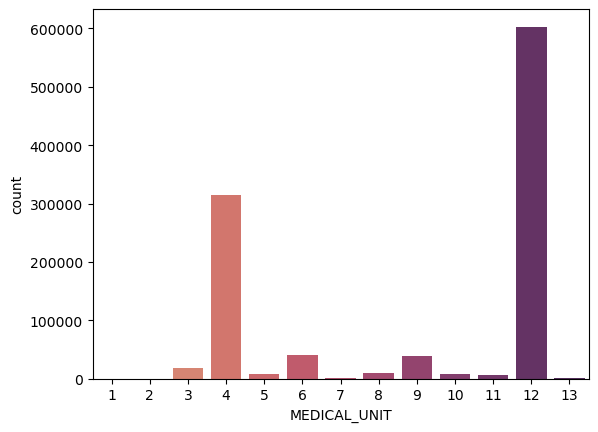

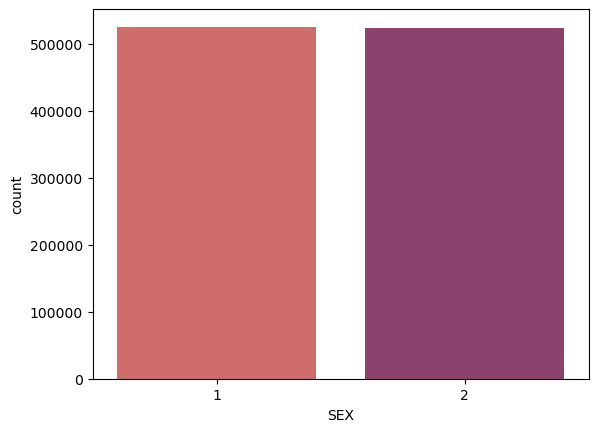

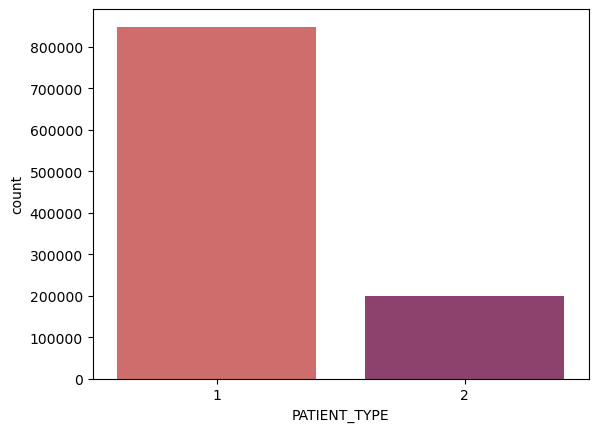

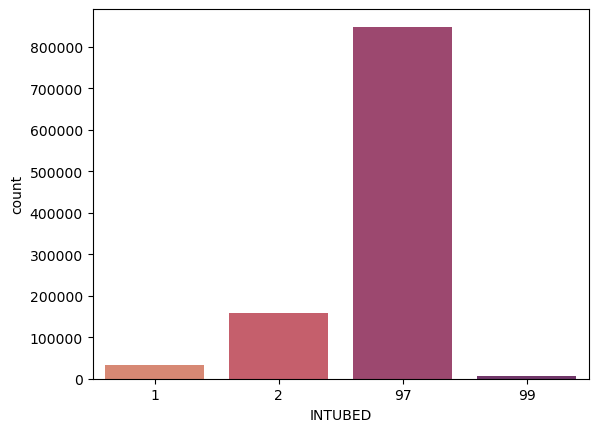

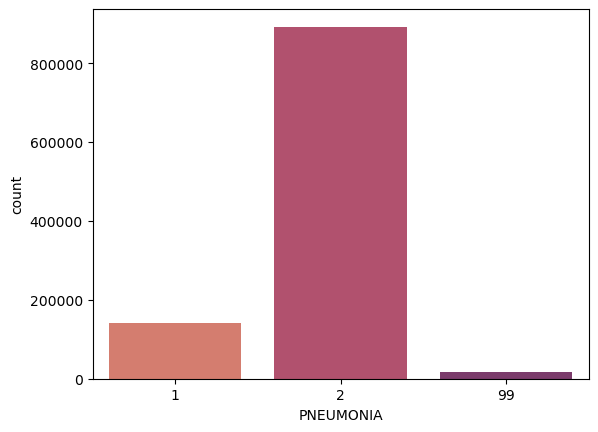

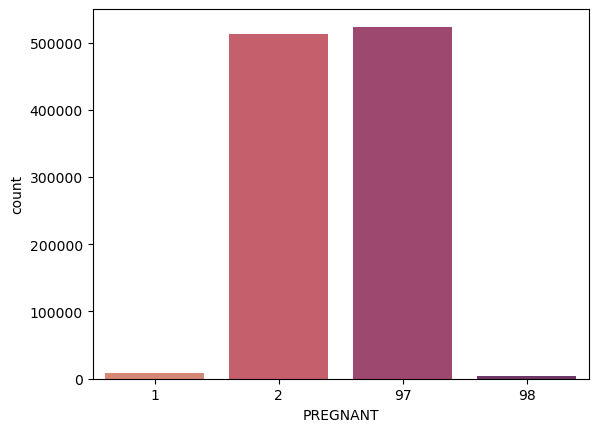

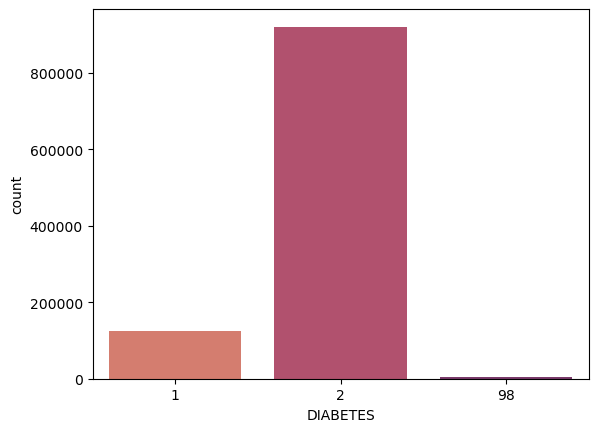

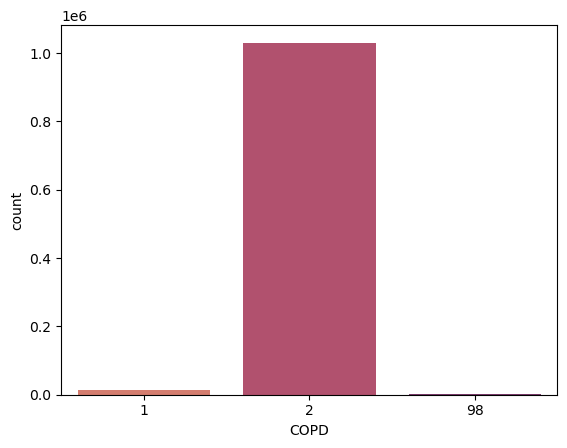

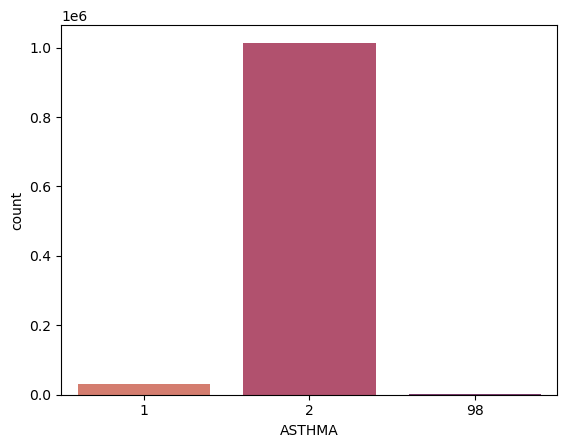

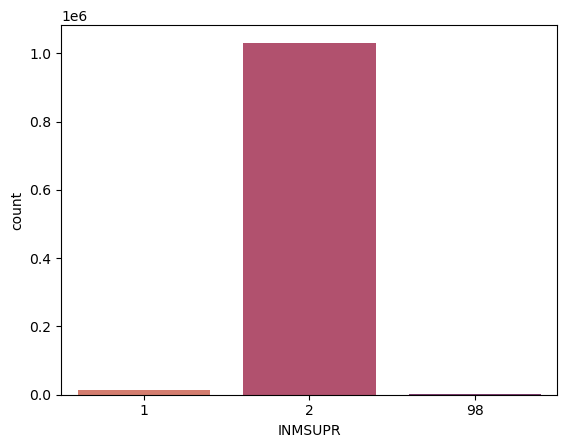

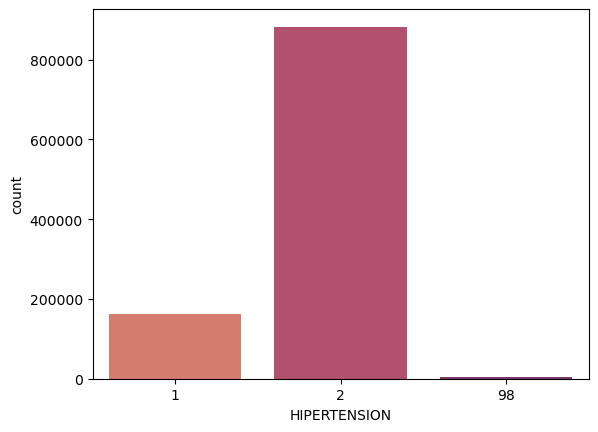

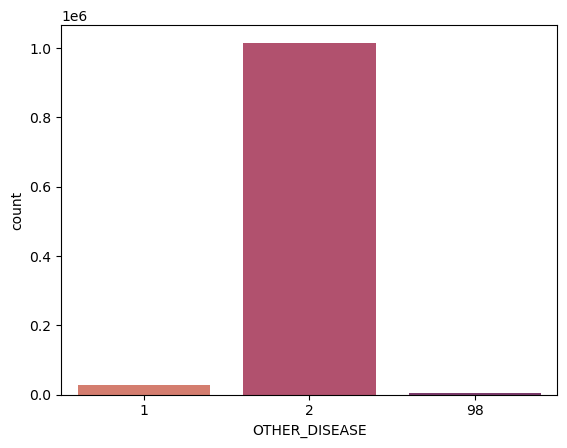

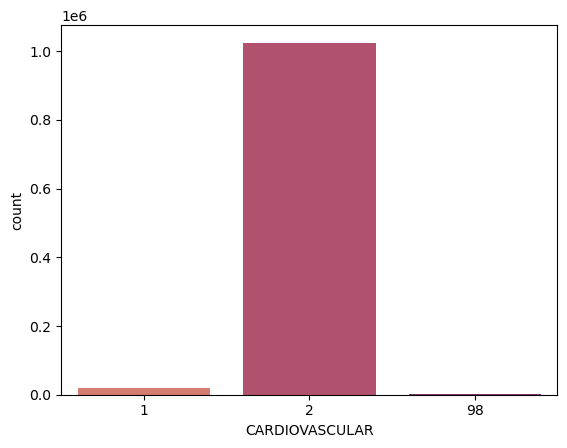

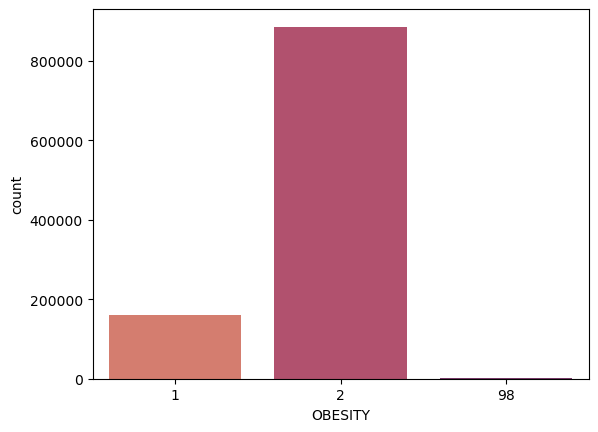

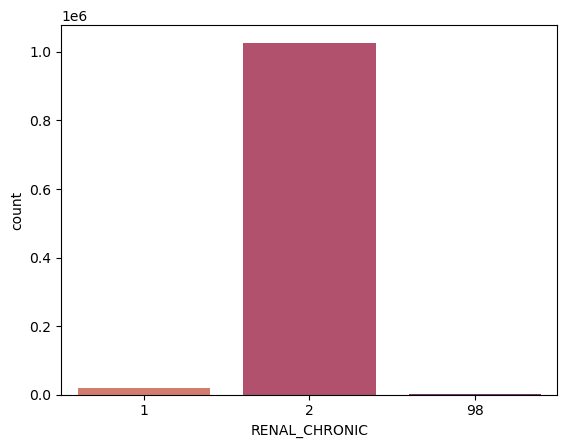

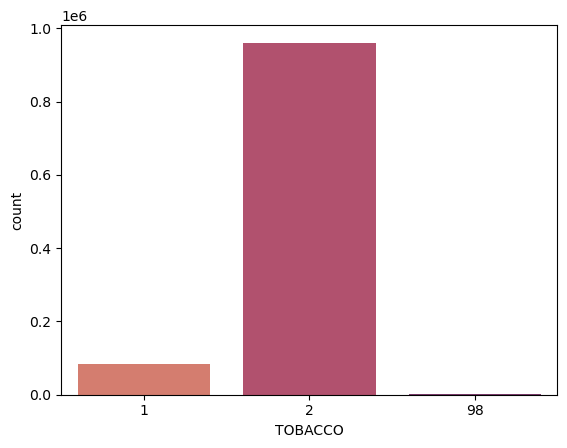

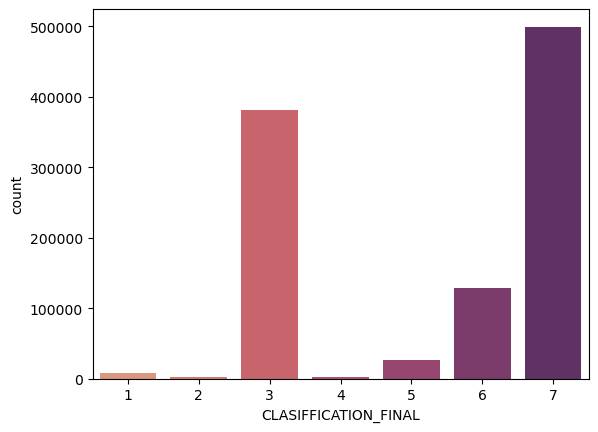

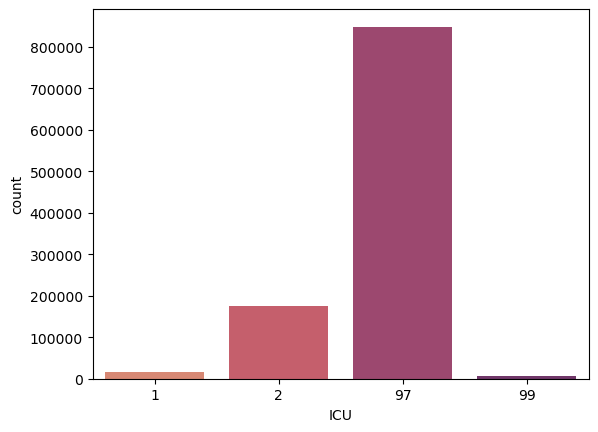

In [7]:
for i in df.loc[:, ~df.columns.isin(["DATE_DIED", "AGE"])]:
    f = sns.countplot(x=df[i],palette='flare');
    plt.show()

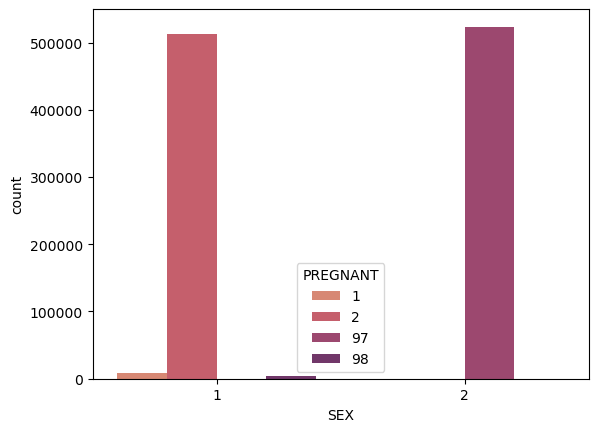

In [8]:
df2=df[['SEX','PREGNANT']]
df2.head()
df2.loc[(df2['SEX']==2) & (df2['PREGNANT']==97)]
plt.figure()
ax=sns.countplot(x=df2["SEX"],hue='PREGNANT',data=df2,palette='flare')





We can see that all missing values for PREGNANT column that has been replaced with 97are for males who can not be pregnant. So we will replace 97 with 2.


In [9]:
df.PREGNANT = df.PREGNANT.replace(97, 2)


**Getting rid of all missing values.**

In [10]:
df = df[(df.PNEUMONIA == 1) | (df.PNEUMONIA == 2)]
df = df[(df.DIABETES == 1) | (df.DIABETES == 2)]
df = df[(df.COPD == 1) | (df.COPD == 2)]
df = df[(df.ASTHMA == 1) | (df.ASTHMA == 2)]
df = df[(df.INMSUPR == 1) | (df.INMSUPR == 2)]
df = df[(df.HIPERTENSION == 1) | (df.HIPERTENSION == 2)]
df = df[(df.OTHER_DISEASE == 1) | (df.OTHER_DISEASE == 2)]
df = df[(df.CARDIOVASCULAR == 1) | (df.CARDIOVASCULAR == 2)]
df = df[(df.OBESITY == 1) | (df.OBESITY == 2)]
df = df[(df.RENAL_CHRONIC == 1) | (df.RENAL_CHRONIC == 2)]
df = df[(df.TOBACCO == 1) | (df.TOBACCO == 2)]

**Labeling 'Death' if there is a date of death.**

In [11]:
df['DEATH'] = [2 if row=='9999-99-99' else 1 for row in df['DATE_DIED']]



In [12]:
df['DEATH'].value_counts()

2    950438
1     74714
Name: DEATH, dtype: int64

In [13]:
for col in df.columns:
    print(col)
    print(df.loc[df[col] == 97, col].count())
    print(df.loc[df[col] == 98, col].count())
    print(df.loc[df[col] == 99, col].count())
    print()

USMER
0
0
0

MEDICAL_UNIT
0
0
0

SEX
0
0
0

PATIENT_TYPE
0
0
0

DATE_DIED
0
0
0

INTUBED
833253
0
2153

PNEUMONIA
0
0
0

AGE
128
115
80

PREGNANT
0
3175
0

DIABETES
0
0
0

COPD
0
0
0

ASTHMA
0
0
0

INMSUPR
0
0
0

HIPERTENSION
0
0
0

OTHER_DISEASE
0
0
0

CARDIOVASCULAR
0
0
0

OBESITY
0
0
0

RENAL_CHRONIC
0
0
0

TOBACCO
0
0
0

CLASIFFICATION_FINAL
0
0
0

ICU
833253
0
2311

DEATH
0
0
0



In [14]:
df['INTUBED'].unique()

array([97,  1,  2, 99])

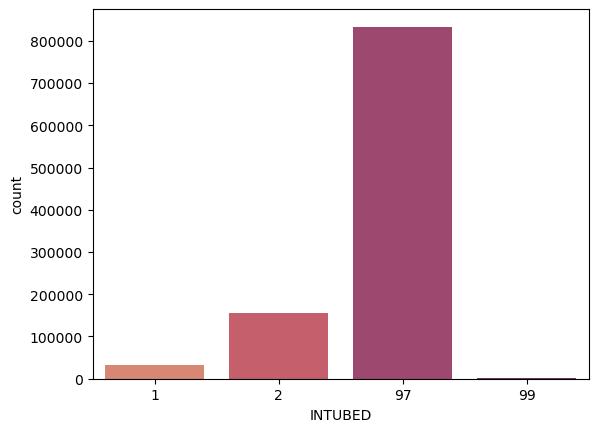

In [15]:
ax=sns.countplot(data=df,x='INTUBED',palette='flare')

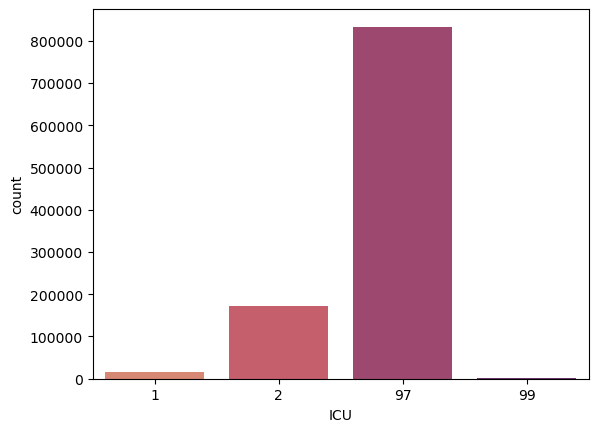

In [16]:
ax=sns.countplot(data=df,x='ICU',palette='flare')

Since there are too many missing values from the columns ICU and INTUBED, we will drop these columns.



In [17]:
df=df.drop(['ICU', 'INTUBED'], axis=1)

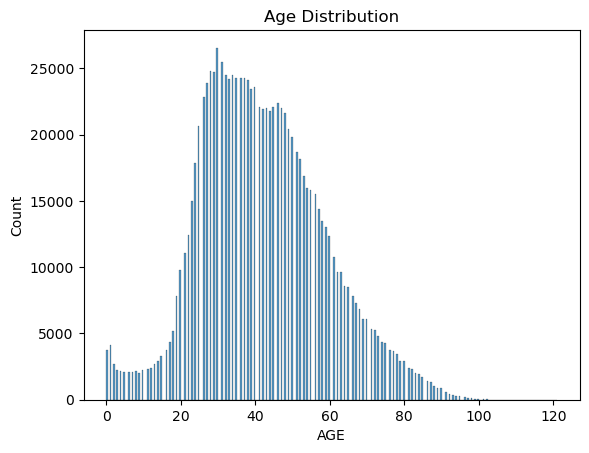

In [18]:
sns.histplot(x=df.AGE)
plt.title("Age Distribution");

* We can see that most covid patients around 20 to 60.

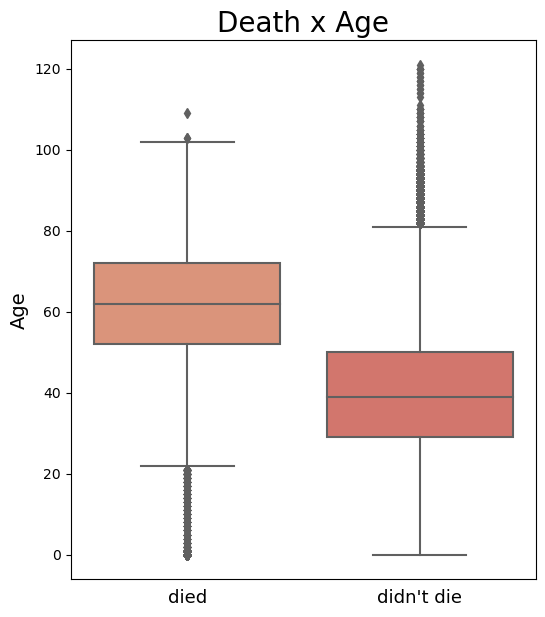

In [19]:
plt.figure(figsize=(6, 7))
sns.boxplot(data=df, x='DEATH', y='AGE', palette=sns.color_palette('flare'))
plt.title('Death x Age', fontsize=20)
plt.xlabel(None)
plt.ylabel('Age', fontsize=14)
plt.tick_params(bottom=False)
plt.xticks([0, 1], ['died', 'didn\'t die'], fontsize=13);

- *We can see patients who are older are more likely to die.*


- In the column CLASSIFICATION_FINAL values 1-3 mean that the patient was diagnosed with covid in different degrees. 4 or higher means that the patient is not a carrier of covid or that the test is inconclusive.
Replacing the values with 1 for covid patients and 2 for the rest.


In [20]:
df.CLASIFFICATION_FINAL = df.CLASIFFICATION_FINAL.replace([1,2,3], 1)
df.CLASIFFICATION_FINAL = df.CLASIFFICATION_FINAL.replace([4,5,6,7], 2)

In [21]:
df.CLASIFFICATION_FINAL.value_counts()

2    636274
1    388878
Name: CLASIFFICATION_FINAL, dtype: int64

### Correlation between the features.

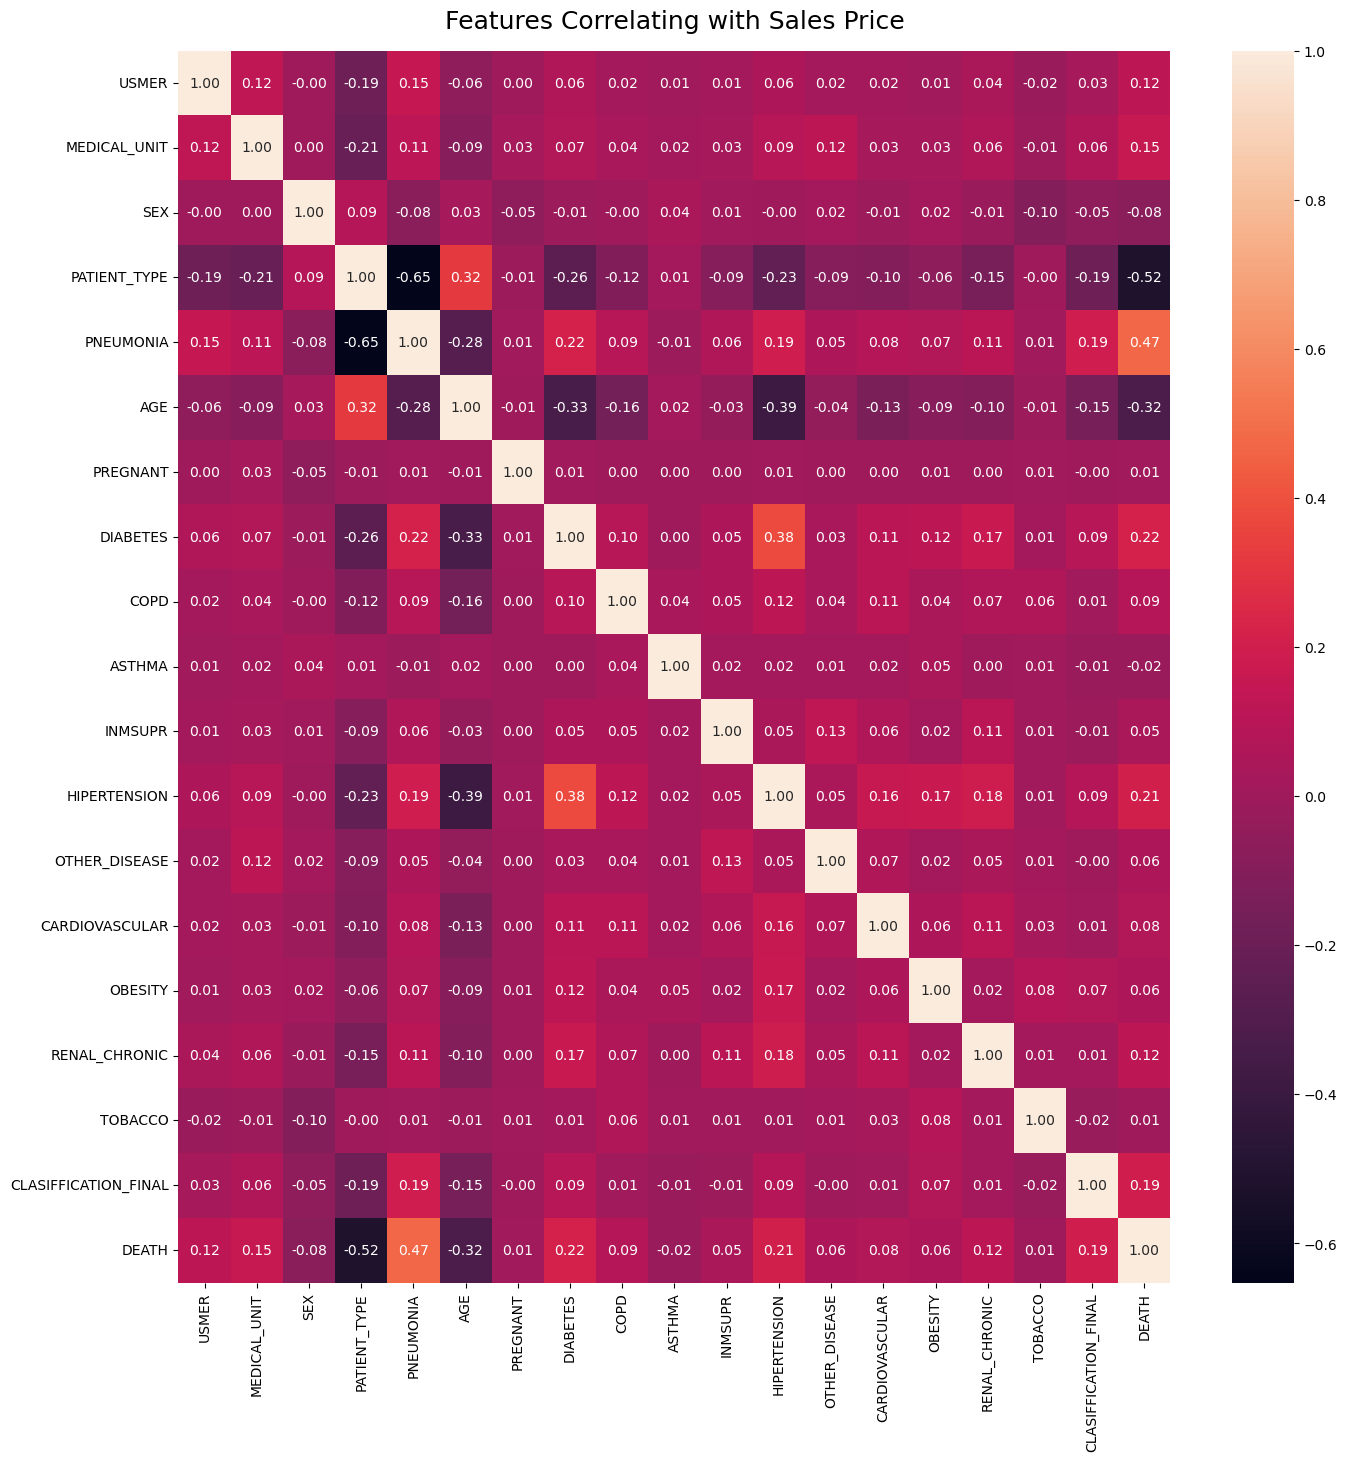

In [21]:
f, ax = plt.subplots(figsize=(16, 16))
heatmap = sns.heatmap(df.corr(),fmt='.2f',annot =True)
heatmap.set_title('Features Correlating with Sales Price', fontdict={'fontsize':18}, pad=16);

Looking at the features that are correlated with death.

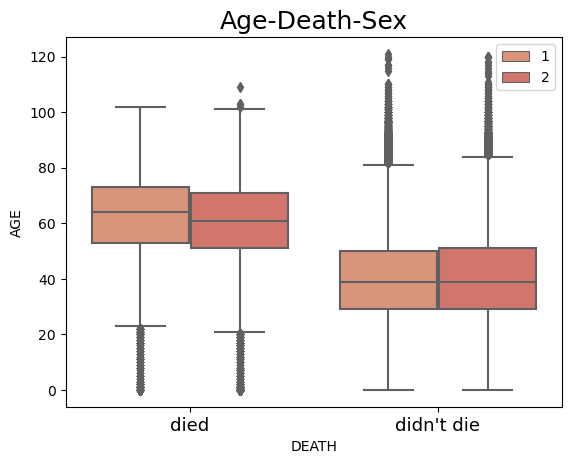

In [24]:
sns.boxplot(x="DEATH", y="AGE",hue="SEX",data=df,palette=sns.color_palette('flare'))
plt.title("Age-Death-Sex",fontsize=18)
plt.legend(loc="best")
plt.xticks([0, 1], ['died', 'didn\'t die'], fontsize=13);

- It is clear to see that people who are older and male are more likely to die from covid.

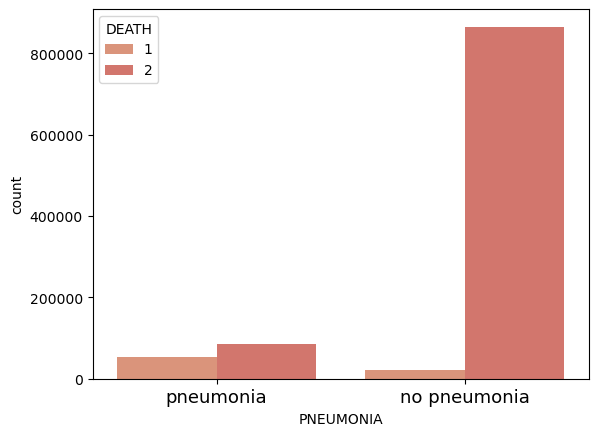

In [25]:
sns.countplot(x="PNEUMONIA",hue='DEATH', data=df,palette=sns.color_palette('flare'))
plt.xticks([0, 1], ['pneumonia', 'no pneumonia'], fontsize=13);

- Also, we can see patients with pneumonia are more likely to die.

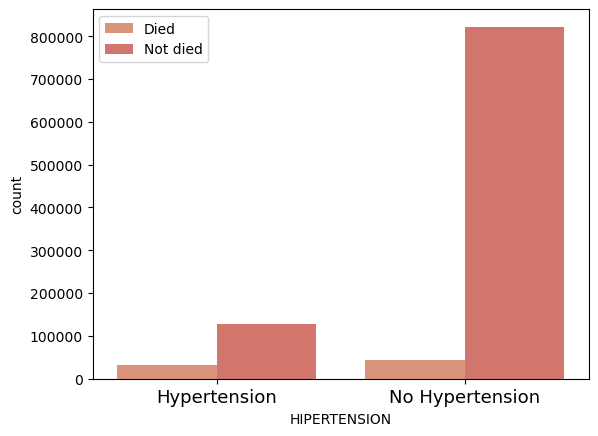

In [28]:
sns.countplot(x="HIPERTENSION",hue='DEATH', data=df,palette=sns.color_palette('flare'))
plt.xticks([0, 1], ['Hypertension', 'No Hypertension'], fontsize=13)
plt.legend(labels=['Died','Not died'])


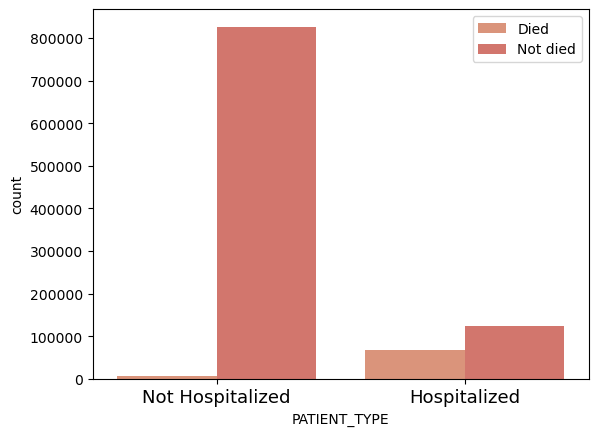

In [31]:
sns.countplot(x="PATIENT_TYPE",hue='DEATH', data=df,palette=sns.color_palette('flare'))
plt.xticks([0, 1], ['Not Hospitalized', 'Hospitalized'], fontsize=13)
plt.legend(labels=['Died','Not died'])